# Data analysis of brainwaves acquired using a low-cost Brain-Computer Interface
Here we play with analysing brainwaves acquired from [OpenBCI](https://openbci.com/)'s Ganglion BCI. 
## EEG introduction
Electroencephalography is a standard technique used to capture the aggregate neural oscillations that occur within the brain. It's the continuous recording of electrical brain activity.

In [1]:
# display video using HMTL package, allowing HTML code within Python environment
from IPython.display import display, HTML
display(HTML('<video src="intro-EEG_short.mp4" controls width="700" preload="auto" poster="intro-EEG_image.png"></video>'))

[The brain](https://ocw.mit.edu/courses/brain-and-cognitive-sciences/9-13-the-human-brain-spring-2019/) may be considered the physical mechanism that is fundemental to the mind.
## Programming language introduction
The Python language [[Python Software Foundation](https://docs.python.org/3/tutorial/), [ Real Python](https://realpython.com/learning-paths/python3-introduction/)] is chosen to conduct the entire pipeline from data pre-processing to analysis. The ease of understanding Python's syntax is one main strength compared to other languages. Secondly, the large collection of already-available data-analysis packages is another.

In [36]:
# requirements
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# brainflow requirements
import brainflow
from brainflow.board_shim import BoardShim, BoardIds
from brainflow.data_filter import DataFilter

# MNE requirements
import os
import numpy as np
import mne

In [46]:
# constants
fileName = 'data-eeg-ganglion_2022-02-22_15-18.json'
Id = BoardIds.GANGLION_BOARD.value

# get JSON data
file = open(fileName, "r")
JSON = json.load(file)
file.close()
list(JSON)

['note', 'Fp1']

In [32]:
# note taken during recording
JSON['note']

"Patient's eyes open, looking at laptop. Device on the floor, 1-metre away from laptop."

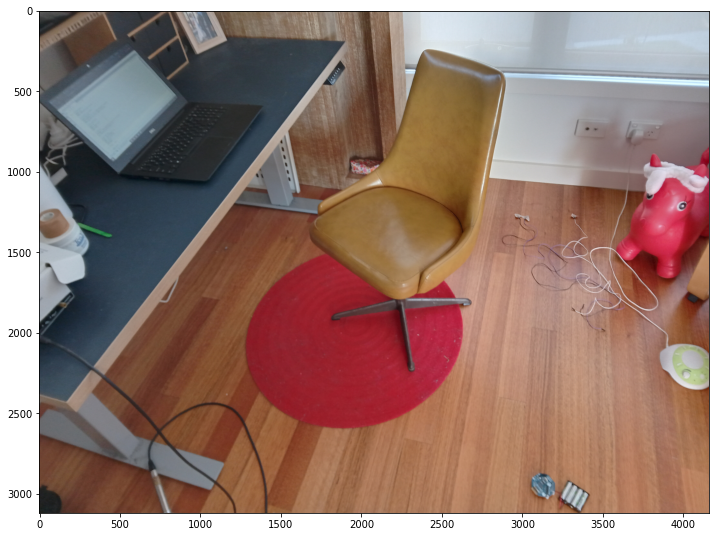

In [45]:
# display recording environment (reconstructed) setup
img = mpimg.imread('./setup_reconstructed.jpg')
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(img)

The above image shows the reconstructed setup for recording. Main aspects incude the laptop (500, 500), BCI (3250, 3000), and chair (2250, 1500) where the person sat. The BCI device was aproximately 1 metre away from the laptop, with no other electronic device within this 1-metre proximity except for a noise machine (4000, 2250) that is normally used for a baby.

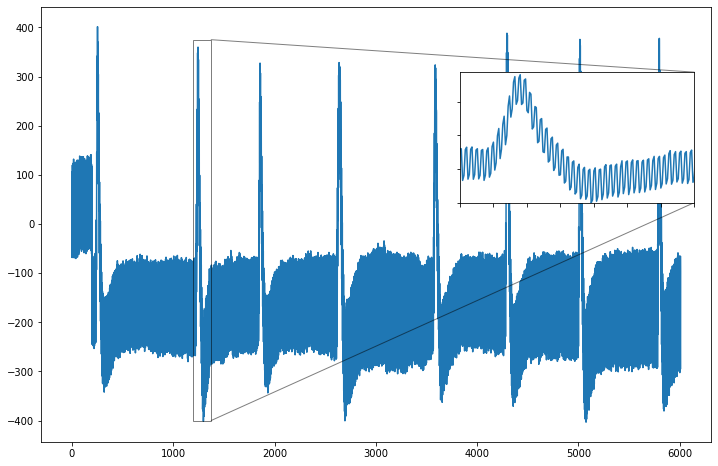

In [105]:
# plot timeseries data
data = JSON['Fp1']
#data = data / 1000000 # BrainFlow returns uV, convert to V for MNE
fig, ax = plt.subplots(figsize=(12, 8))
#ax.set_xticklabels([-5, 0, 5, 10, 15, 20, 25, 30])

ax.plot(data)
axins = ax.inset_axes([0.625, 0.55, 0.35, 0.3])
# sub region of the original image
x1, x2, y1, y2 = 1200, 1375, -400, 375
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.plot(data)

The above figure is a EEG recording of the single channel 'Fp1'. The person was looking at the laptop screen during the recording. The figure shows numerous high-amplitude spikes that represent eye-blink artifacts. Immediately after these blinks electrical activity dips, then return to baseline level. Interestingly, the baseline appears to centre around a non-zero value.

In [35]:
#DataFilter.remove_environmental_noise(data[1], BoardShim.get_sampling_rate(Id), 
                                      #NoiseTypes.SIXTY.value) # FIFTY and SIXTY methods only available